In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime Handling
import datetime

# File System Operations
import os

In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# File name only
file_name = "imdb_movies.csv"

# Load the dataset (file must be in the current working directory)
df = pd.read_csv(file_name)

In [3]:
# Perform EDA
print("\nInitial Dataset Info:")
print(df.info())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB
None


In [6]:
# List of columns to remove
columns_to_remove = ['status', 'date_x', 'orig_lang', 'budget_x', 'revenue', 'overview','country']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Verify the changes
print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   score       10178 non-null  float64
 2   genre       10093 non-null  object 
 3   crew        10122 non-null  object 
 4   orig_title  10178 non-null  object 
dtypes: float64(1), object(4)
memory usage: 397.7+ KB
None

Preview of Updated DataFrame:


,names,score,genre,crew,orig_title
0,Creed III,73.0,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III
1,Avatar: The Way of Water,78.0,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water
2,The Super Mario Bros. Movie,76.0,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie
3,Mummies,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias
4,Supercell,61.0,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell


In [7]:
df = df.drop(columns=['names'])

df = df.rename(columns={'orig_title': 'Titles'})

print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   10178 non-null  float64
 1   genre   10093 non-null  object 
 2   crew    10122 non-null  object 
 3   Titles  10178 non-null  object 
dtypes: float64(1), object(3)
memory usage: 318.2+ KB
None

Preview of Updated DataFrame:


,score,genre,crew,Titles
0,73.0,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III
1,78.0,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water
2,76.0,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie
3,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias
4,61.0,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell


In [8]:
# 1. Check for null or missing values
print("\nChecking for Null Values:")
print(df.isnull().sum())  # Count of missing values in each column

# 2. Check for duplicate rows
print("\nChecking for Duplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df = df.drop_duplicates()

# Display updated dataset info
print("\nUpdated Dataset Info:")
df.info()


Checking for Null Values:
score      0
genre     85
crew      56
Titles     0
dtype: int64

Checking for Duplicate Rows:
Number of duplicate rows: 178

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10177
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   10000 non-null  float64
 1   genre   9915 non-null   object 
 2   crew    9944 non-null   object 
 3   Titles  10000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 390.6+ KB


In [9]:
# Handle missing values (example: dropping rows with null values)
df = df.dropna()

print("\nChecking for Null Values:")
print(df.isnull().sum()) 

# Display updated dataset info
print("\nUpdated Dataset Info:")
df.info()


Checking for Null Values:
score     0
genre     0
crew      0
Titles    0
dtype: int64

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9874 entries, 0 to 10177
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   9874 non-null   float64
 1   genre   9874 non-null   object 
 2   crew    9874 non-null   object 
 3   Titles  9874 non-null   object 
dtypes: float64(1), object(3)
memory usage: 385.7+ KB


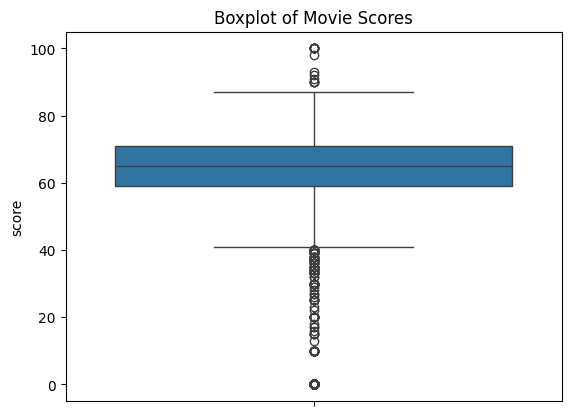

In [10]:
sns.boxplot(df['score'])
plt.title("Boxplot of Movie Scores")
plt.show()


In [13]:
from scipy.stats.mstats import winsorize

# Apply Winsorization on the 'score' column
# Winsorize the data: limits=(lower limit, upper limit) as percentages
df['score'] = winsorize(df['score'], limits=(0.05, 0.05))  # Trims 5% from both ends

print("\nWinsorized Data Info:")
print(df.describe())


Winsorized Data Info:
             score
count  9874.000000
mean     64.697691
std       8.946608
min      45.000000
25%      59.000000
50%      65.000000
75%      71.000000
max      79.000000


E:\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


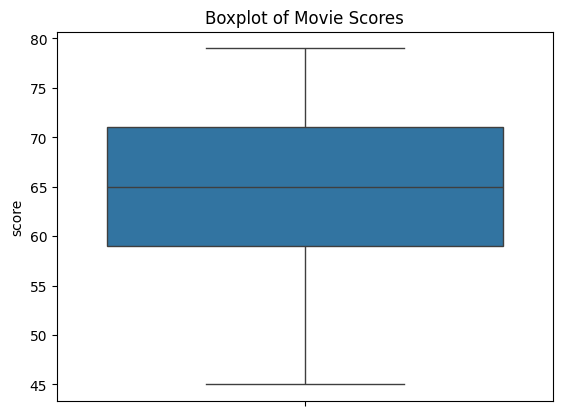

In [14]:
sns.boxplot(df['score'])
plt.title("Boxplot of Movie Scores")
plt.show()


In [21]:
df = df.rename(columns={'crew': 'Actors'})

df.head()

,score,genre,Actors,Titles
0,73.0,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III
1,78.0,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water
2,76.0,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie
3,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias
4,61.0,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9874 entries, 0 to 10177
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   9874 non-null   float64
 1   genre   9874 non-null   object 
 2   crew    9874 non-null   object 
 3   Titles  9874 non-null   object 
dtypes: float64(1), object(3)
memory usage: 385.7+ KB


In [22]:
# Save the cleaned DataFrame
df.to_csv('Cleaned_imdb_movies.csv', index=False)


In [20]:
print(df.shape)

(9874, 4)
